# HAR Data Loading & Preprocessing

In [ ]:
#The presented code and results belong to the following report:
#By Faiza Alam, Mahbub Hossain & Farhan Mohd. Fokrul Alam
#Human Activity Recognition
#Dataset: Nahid, Abdullah-Al; Sikder, Niloy; Rafi, Ibrahim (2021), “KU-HAR: An Open Dataset for Human Activity Recognition”, Mendeley Data, V5, doi: 10.17632/45f952y38r.5
#https://data.mendeley.com/datasets/45f952y38r/5

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/ML/3.Time_domain_subsamples.zip

Archive:  /content/drive/MyDrive/ML/3.Time_domain_subsamples.zip
replace KU-HAR_time_domain_subsamples_20750x300.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,recall_score, precision_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import pandas as pd

# To do linear algebra
from numpy import pi

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

from scipy.stats import norm,skew, probplot
from scipy.optimize import curve_fit

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from lightgbm import LGBMClassifier

from time import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import itertools
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix,f1_score,matthews_corrcoef, roc_auc_score
# import XGBoost
import xgboost as xgb
# import XGBClassifier
from xgboost import XGBClassifier
# import logistic regression
from sklearn.linear_model import LogisticRegression
# import SVC classifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import keras
import keras.utils
from keras import utils as np_utils

from scipy.signal import find_peaks
from scipy import stats

In [ ]:
df = pd.read_csv("/content/KU-HAR_time_domain_subsamples_20750x300.csv",header=None)
dff = df.values
signals = dff[:, 0: 1800] #These are the time-domian subsamples (signals) 
signals = np.array(signals, dtype=np.float32)
labels = dff[:, 1800] #These are their associated class labels (signals)

print(signals.shape)

(20750, 1800)


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800,1801,1802
20745,1.8716,1.6488,1.60890,1.80230,1.47500,1.390700,1.13780,1.28960,0.96375,1.022200,1.74060,0.94338,2.33520,0.270580,2.211300,5.260400,2.75680,-0.55682,0.030089,-1.0348,-3.91630,-0.428170,2.51850,0.012873,1.52750,0.79911,2.12170,2.156800,1.470100,2.870300,2.36800,-0.85092,-1.33580,0.35271,1.25510,0.443930,0.38259,1.30750,-0.70573,-1.12010,...,0.393570,0.371170,0.249590,0.12527,0.099327,0.052213,0.034262,-0.012411,-0.032257,-0.084295,-0.126360,-0.105460,-0.063783,-0.048431,0.007495,0.035550,-0.129900,-0.308940,-0.376050,-0.528120,-0.564250,-0.52832,-0.480580,-0.441880,-0.37032,-0.371580,-0.398040,-0.410590,-0.480470,-0.53814,-0.49764,-0.43259,-0.414760,-0.363110,-0.329190,-0.460960,-0.621920,9,300,20746
20746,1.8894,2.0227,0.81730,-0.50584,2.46220,3.814200,2.66100,2.65120,1.99140,4.427300,5.97110,3.24850,-1.14490,0.969250,-2.483300,-2.474500,-0.50089,-0.67807,-0.670580,1.3354,1.17150,0.858140,1.25750,2.007100,2.55880,1.94730,0.30066,0.207740,-0.014855,-0.711390,0.67138,1.77520,2.19880,-1.38070,-1.10590,-0.653960,-2.11740,-1.53350,1.36240,1.41820,...,1.147400,1.155100,1.172700,1.16890,1.125200,1.098700,1.051600,0.934530,0.807510,0.716730,0.701160,0.542750,0.357710,0.310080,0.218620,0.190570,0.124570,0.095531,0.024546,-0.048593,-0.058614,-0.07886,-0.078623,-0.044195,-0.01908,0.004026,0.042637,0.016722,-0.075675,-0.10947,-0.20882,-0.28893,-0.320880,-0.379540,-0.408210,-0.507970,-0.548040,9,300,20747
20747,1.2695,1.3122,0.72557,0.53129,0.95842,-0.049679,1.22310,1.83700,0.98974,1.882600,1.52290,0.93061,1.02760,1.982500,3.348100,2.227100,3.39150,2.86490,2.869600,2.6779,2.44240,3.064200,2.31990,3.609000,3.83440,2.19360,2.12850,1.561900,0.703020,0.823440,0.26217,-0.16012,0.25418,1.58430,0.97928,2.240200,2.59830,1.22350,0.64076,0.74475,...,-0.371250,-0.345060,-0.330770,-0.21027,0.062868,0.132020,0.261250,0.325100,0.598000,0.898440,0.953460,1.062500,1.064600,0.832470,0.655370,0.760180,0.914940,1.002100,1.312000,1.446400,1.776700,2.09170,2.071300,2.026300,1.98560,1.765800,1.632900,1.550500,1.431600,1.38280,1.21850,1.12540,0.639470,0.277320,0.172710,-0.002894,0.023955,9,300,20748
20748,-5.5622,-2.7970,-2.35330,-3.07560,-4.13610,-4.028800,-0.58026,0.34607,-2.63170,-2.790000,-2.86780,-2.99570,-3.37690,0.215840,0.698770,0.415250,-0.61255,-0.88968,-1.061200,-1.3126,-0.01512,0.089774,-0.24168,1.058800,0.90355,-0.79466,-1.52990,-0.024145,1.350500,-0.008132,0.94737,0.70096,0.32479,0.44440,0.52502,-0.048851,-0.02038,1.67740,0.96095,2.23280,...,0.061767,-0.037103,-0.072374,-0.21798,-0.356640,-0.338910,-0.314310,-0.302230,-0.229460,-0.190910,-0.244400,-0.302090,-0.336110,-0.437610,-0.464300,-0.420880,-0.389260,-0.366260,-0.323830,-0.326010,-0.346490,-0.35674,-0.423260,-0.477130,-0.50671,-0.564420,-0.573600,-0.573510,-0.572520,-0.43918,-0.24667,-0.20902,-0.128670,-0.104730,-0.131960,-0.150780,-0.187320,9,300,20749
20749,0.8381,-1.2116,-0.56718,-0.55532,-0.64496,-0.232160,0.36707,-0.04070,0.18598,-0.009721,0.45146,0.58319,0.27811,0.081182,0.088696,0.005247,-0.76956,1.10330,1.791200,0.8767,0.90174,1.087300,-0.23316,-0.927400,-0.13343,0.90689,0.42443,-0.549070,-0.196810,-0.178550,-0.64507,-0.38725,0.34841,-0.12315,0.24493,0.004159,-0.14166,-0.25646,-0.21177,0.15912,...,0.132570,0.196980,0.212090,0.24646,0.253720,0.248840,0.245950,0.214700,0.170780,0.132610,0.018233,-0.019218,-0.116120,-0.199030,-0.157660,-0.076229,-0.039824,0.071249,0.116760,0.167410,0.222620,0.21971,0.201280,0.202320,0.25659,0.297490,0.319670,0.367400,0.353460,0.29081,0.26162,0.11912,0.004095,0.006755,0.013448,0.027566,0.140510,9,300,20750


In [ ]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=signals,label=labels)

In [ ]:
# DFT of the time-domain signals, separately for each channel

fft = np.zeros(signals.shape, dtype=np.float32)
for i in range(0,len(signals)):
    for j in range(0, 6):
        tmp = np.fft.fft(signals[i, j*300:(j+1)*300])
        fft[i, j*300:(j+1)*300] = abs(tmp)
        
print(fft.shape)

(20750, 1800)


In [ ]:
pd_fft = pd.DataFrame(fft)
pd_fft.describe()

pd_labels = pd.DataFrame(labels)


In [ ]:
pd_fft.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
0,6.058580,0.273496,1.179259,0.535533,1.140474,0.152083,0.840698,0.576329,0.239720,0.691060,1.186103,0.765172,1.148264,1.470109,1.334950,0.522895,1.173929,2.316659,1.995646,1.675706,2.072372,0.800834,1.446182,0.447193,3.838237,8.598404,2.553689,3.695269,1.112531,0.754498,0.447556,0.997092,0.516547,0.591619,0.315564,0.791425,0.499359,0.833771,0.721680,0.718638,...,0.023878,0.025869,0.029673,0.053002,0.061266,0.016110,0.012920,0.030175,0.041020,0.081169,0.034221,0.090081,0.095620,0.169281,0.157305,0.734394,0.241051,0.111280,0.146039,0.159298,0.122335,0.118457,0.261862,0.392391,0.203686,0.050838,0.366494,0.249222,0.290266,0.229860,0.194264,0.185795,0.049523,0.074647,0.188430,0.177158,0.444133,0.417925,0.654713,0.482188
1,5.293144,0.260169,0.593212,0.168227,0.153629,0.428229,0.103643,0.388941,0.377599,0.202469,0.439788,0.379700,0.486549,1.268376,0.808668,0.957500,0.861974,0.378719,0.327509,0.747591,0.283588,0.789660,0.392350,0.642555,5.742160,2.034961,1.410751,1.091390,1.723836,1.203151,1.476452,0.095788,1.120687,0.467860,0.297226,0.581257,0.620837,0.188991,0.115102,0.380823,...,0.032449,0.021270,0.040171,0.021045,0.047554,0.028368,0.055699,0.056273,0.068645,0.033808,0.118551,0.098112,0.021570,0.061511,0.149404,0.091292,0.792579,0.158994,0.109014,0.143404,0.058654,0.150291,0.078255,0.093786,0.068614,0.127496,0.085488,0.038393,0.089823,0.033155,0.087114,0.036854,0.041880,0.106659,0.093762,0.053484,0.032473,0.298644,0.215010,0.200065
2,4.832682,0.666655,0.477724,0.603664,0.446667,0.289116,0.200557,0.903229,0.405768,0.524012,0.183287,0.467968,0.602051,0.391638,0.957158,0.660377,1.220091,0.395103,0.663963,0.617315,0.598707,1.722673,0.936807,2.438322,5.037629,1.337442,1.427209,2.004926,0.288282,1.701676,0.339330,0.514029,0.370943,0.295884,0.622056,0.519282,0.196359,0.539859,0.496761,0.411704,...,0.043984,0.015548,0.032151,0.013156,0.037561,0.015801,0.010143,0.065654,0.044839,0.088456,0.122280,0.135380,0.131973,0.056826,0.120389,0.048254,0.895245,0.359766,0.014170,0.244498,0.181157,0.137718,0.185414,0.141059,0.056738,0.159302,0.123729,0.103487,0.057142,0.066937,0.106355,0.051916,0.073779,0.029999,0.106655,0.069221,0.117349,0.467452,0.301199,0.164491
3,6.589204,0.592314,0.568700,1.085516,0.553400,0.420281,0.429776,0.392644,0.697227,0.663075,0.544138,0.228582,1.042456,1.402750,0.763289,0.100321,0.966124,0.638343,0.753808,0.631640,1.149481,0.453441,1.380792,2.720314,3.473782,1.293439,2.926120,2.838272,2.668036,0.511858,0.974205,0.837053,0.663918,0.925780,0.728927,0.237140,0.827782,0.594564,0.338605,0.276565,...,0.021771,0.008931,0.062966,0.018956,0.069595,0.044832,0.043798,0.121308,0.018359,0.138437,0.097958,0.150669,0.104881,0.073351,0.094272,0.209347,0.561525,0.354936,0.152264,0.071711,0.032189,0.180541,0.048994,0.032715,0.077281,0.030313,0.105591,0.127233,0.109588,0.035899,0.114686,0.134564,0.081629,0.240619,0.175759,0.182317,0.105177,0.254456,0.474780,0.280463
4,5.546648,0.781495,0.851947,0.142692,0.232562,0.498809,0.387429,0.076312,0.554076,0.488413,0.167028,0.153967,0.640737,0.714185,0.670699,1.597205,0.922845,0.467645,0.500297,1.465893,0.358418,0.528799,0.954701,1.842132,0.906617,0.690172,1.396455,0.480343,3.016902,0.303237,0.465247,0.641137,0.803688,0.987235,0.101147,0.686260,0.455359,0.670061,0.357339,0.479970,...,0.035396,0.042960,0.026347,0.029979,0.018462,0.051352,0.049778,0.057196,0.094558,0.026834,0.050273,0.095464,0.111549,0.099254,0.089759,0.106320,0.028143,0.116691,0.084009,0.030553,0.032689,0.126325,0.105682,0.163661,0.109161,0.118165,0.090259,0.155682,0.046509,0.066056,0.109713,0.061016,0.065265,0.117727,0.102709,0.165226,0.369874,0.028092,0.510515,0.265811


In [ ]:
d = {'STAND': '0',
    'SIT': '1',
     'TALK_SIT': '2',
     'TALK_STAND': '3',
     'STAND_SIT': '4',
     'LAY': '5',
     'LAY_STAND': '6',
     'PICK': '7',
     'JUMP': '8',
     'PUSH_UP': '9',
     'SIT_UP': '10',
     'WALK': '11',
     'WALK_BACKWARD': '12',
     'WALK_CIRCLE': '13',
     'RUN': '14',
     'STAIR_UP': '15',
     'STAIR_DOWN': '16',
     'TABLE_TENNIS': '17'}

print(d['STAND'])

0


# Exploratory Data Analysis 

In [ ]:
pd_labels.columns =['ACTIVITY']

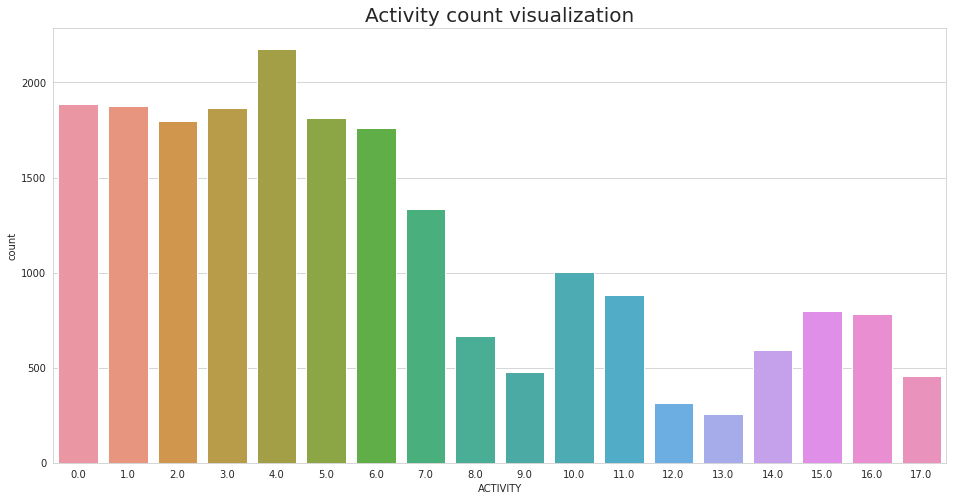

In [ ]:

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Activity count visualization', fontsize=20)
sns.countplot(x='ACTIVITY', data = pd_labels)
plt.show()

(300,)


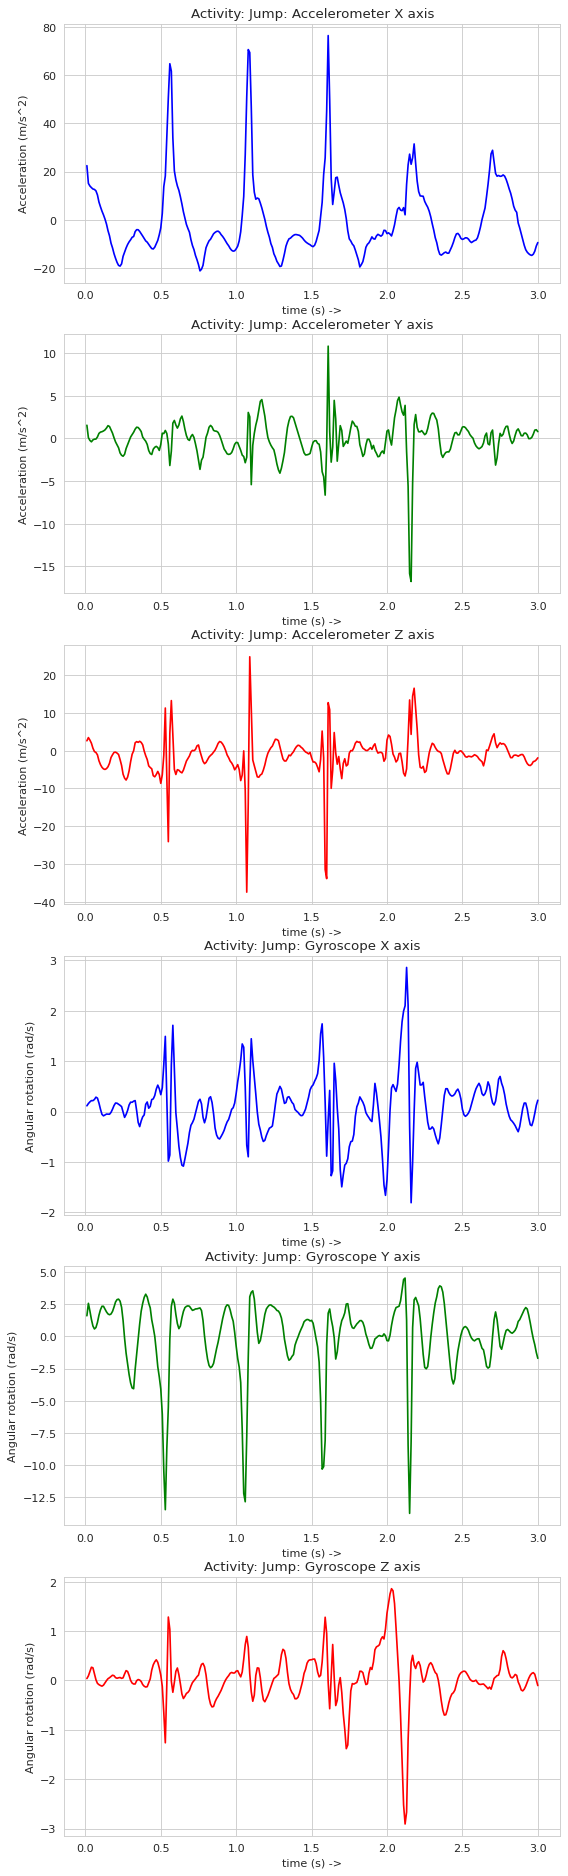

In [ ]:
# Visualization of the 20001th sample (the correspondig activity is "Jump"):

Accelerometer_X_axis_data = signals[20000, 0: 300]
Accelerometer_Y_axis_data = signals[20000, 300: 600]
Accelerometer_Z_axis_data = signals[20000, 600: 900]
Gyroscope_X_axis_data = signals[20000, 900: 1200]
Gyroscope_Y_axis_data = signals[20000, 1200: 1500]
Gyroscope_Z_axis_data = signals[20000, 1500: 1800]

print(Accelerometer_Z_axis_data.shape)
time = np.linspace(.01, 3, 300)

figure(figsize=(8, 30), dpi=80)

ax1 = plt.subplot(6,1,1)
ax1.plot(time, Accelerometer_X_axis_data, 'b')
ax1.title.set_text('Activity: Jump: Accelerometer X axis')
ax1.set_xlabel('time (s) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax2 = plt.subplot(6,1,2)
ax2.plot(time, Accelerometer_Y_axis_data, 'g')
ax2.title.set_text('Activity: Jump: Accelerometer Y axis')
ax2.set_xlabel('time (s) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax3 = plt.subplot(6,1,3)
ax3.plot(time, Accelerometer_Z_axis_data, 'r')
ax3.title.set_text('Activity: Jump: Accelerometer Z axis')
ax3.set_xlabel('time (s) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax4 = plt.subplot(6,1,4)
ax4.plot(time, Gyroscope_X_axis_data, 'b')
ax4.title.set_text('Activity: Jump: Gyroscope X axis')
ax4.set_xlabel('time (s) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax5 = plt.subplot(6,1,5)
ax5.plot(time, Gyroscope_Y_axis_data, 'g')
ax5.title.set_text('Activity: Jump: Gyroscope Y axis')
ax5.set_xlabel('time (s) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax6 = plt.subplot(6,1,6)
ax6.plot(time, Gyroscope_Z_axis_data, 'r')
ax6.title.set_text('Activity: Jump: Gyroscope Z axis')
ax6.set_xlabel('time (s) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

plt.show()

(300,)


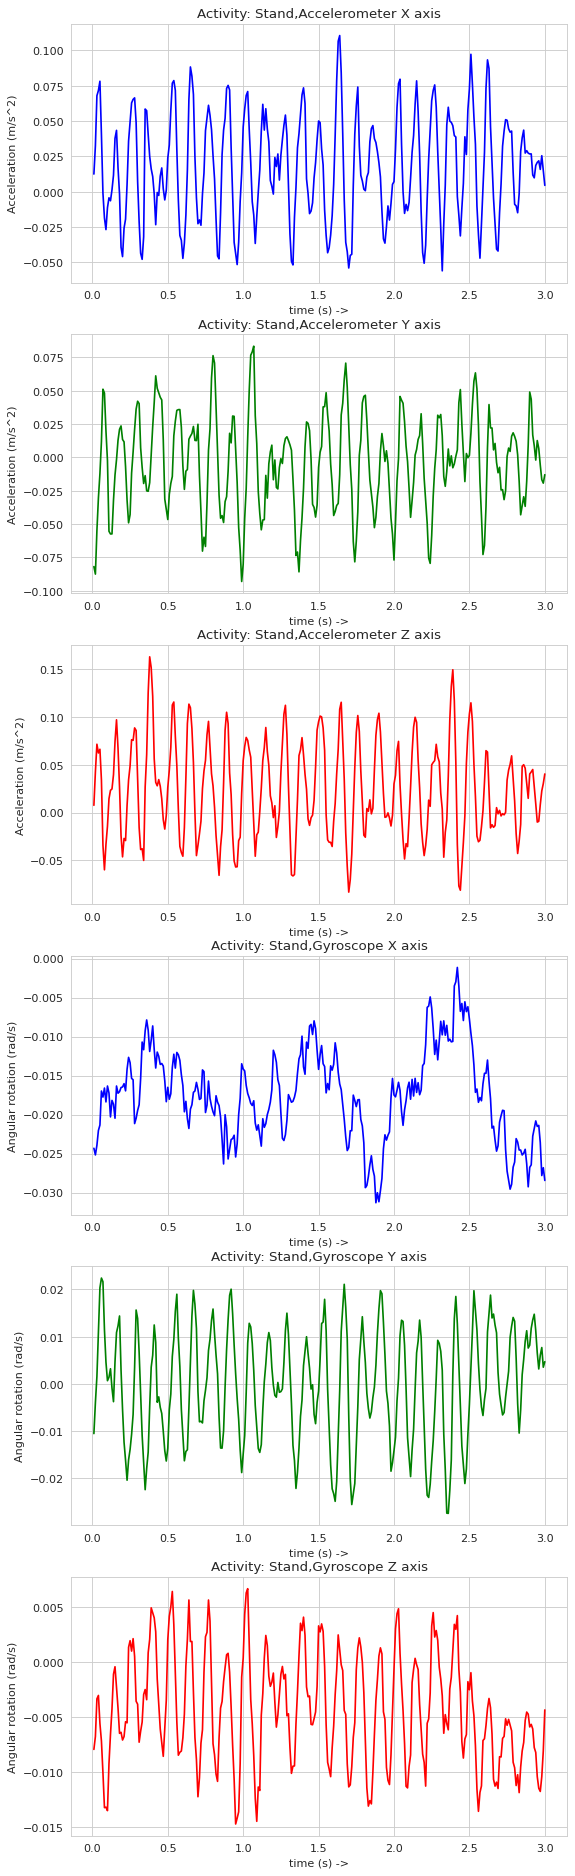

In [ ]:
# Visualization of the 2nd sample (the correspondig activity is "Stand"):

Accelerometer_X_axis_data = signals[1, 0: 300]
Accelerometer_Y_axis_data = signals[1, 300: 600]
Accelerometer_Z_axis_data = signals[1, 600: 900]
Gyroscope_X_axis_data = signals[1, 900: 1200]
Gyroscope_Y_axis_data = signals[1, 1200: 1500]
Gyroscope_Z_axis_data = signals[1, 1500: 1800]

print(Accelerometer_Z_axis_data.shape)
time = np.linspace(.01, 3, 300)

figure(figsize=(8, 30), dpi=80)

ax1 = plt.subplot(6,1,1)
ax1.plot(time, Accelerometer_X_axis_data, 'b')
ax1.title.set_text('Activity: Stand,Accelerometer X axis')
ax1.set_xlabel('time (s) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax2 = plt.subplot(6,1,2)
ax2.plot(time, Accelerometer_Y_axis_data, 'g')
ax2.title.set_text('Activity: Stand,Accelerometer Y axis')
ax2.set_xlabel('time (s) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax3 = plt.subplot(6,1,3)
ax3.plot(time, Accelerometer_Z_axis_data, 'r')
ax3.title.set_text('Activity: Stand,Accelerometer Z axis')
ax3.set_xlabel('time (s) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax4 = plt.subplot(6,1,4)
ax4.plot(time, Gyroscope_X_axis_data, 'b')
ax4.title.set_text('Activity: Stand,Gyroscope X axis')
ax4.set_xlabel('time (s) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax5 = plt.subplot(6,1,5)
ax5.plot(time, Gyroscope_Y_axis_data, 'g')
ax5.title.set_text('Activity: Stand,Gyroscope Y axis')
ax5.set_xlabel('time (s) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax6 = plt.subplot(6,1,6)
ax6.plot(time, Gyroscope_Z_axis_data, 'r')
ax6.title.set_text('Activity: Stand,Gyroscope Z axis')
ax6.set_xlabel('time (s) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

plt.show()

(300,)


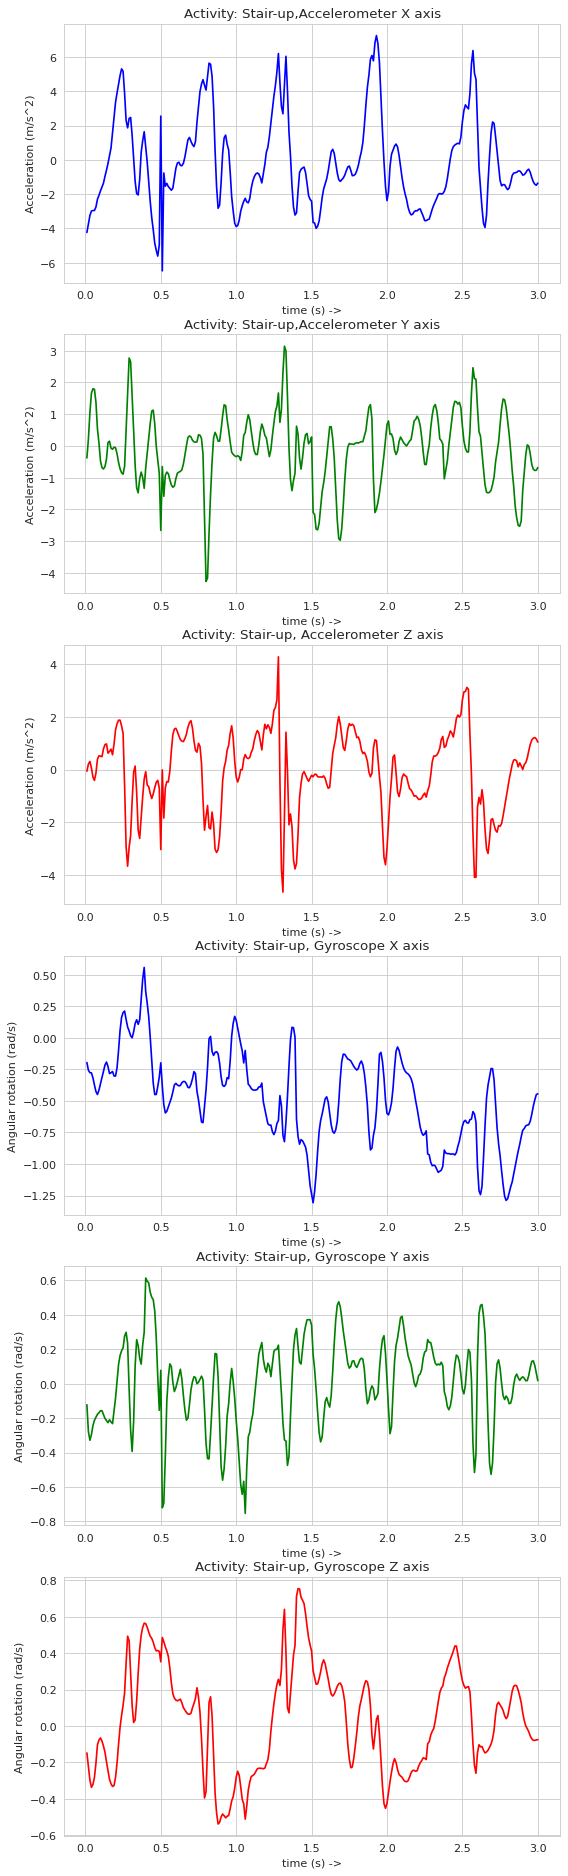

In [ ]:
# Visualization of the 7000th sample (the correspondig activity is "Stair-up"):

Accelerometer_X_axis_data = signals[7000, 0: 300]
Accelerometer_Y_axis_data = signals[7000, 300: 600]
Accelerometer_Z_axis_data = signals[7000, 600: 900]
Gyroscope_X_axis_data = signals[7000, 900: 1200]
Gyroscope_Y_axis_data = signals[7000, 1200: 1500]
Gyroscope_Z_axis_data = signals[7000, 1500: 1800]

print(Accelerometer_Z_axis_data.shape)
time = np.linspace(.01, 3, 300)

figure(figsize=(8, 30), dpi=80)

ax1 = plt.subplot(6,1,1)
ax1.plot(time, Accelerometer_X_axis_data, 'b')
ax1.title.set_text('Activity: Stair-up,Accelerometer X axis')
ax1.set_xlabel('time (s) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax2 = plt.subplot(6,1,2)
ax2.plot(time, Accelerometer_Y_axis_data, 'g')
ax2.title.set_text('Activity: Stair-up,Accelerometer Y axis')
ax2.set_xlabel('time (s) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax3 = plt.subplot(6,1,3)
ax3.plot(time, Accelerometer_Z_axis_data, 'r')
ax3.title.set_text('Activity: Stair-up, Accelerometer Z axis')
ax3.set_xlabel('time (s) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax4 = plt.subplot(6,1,4)
ax4.plot(time, Gyroscope_X_axis_data, 'b')
ax4.title.set_text('Activity: Stair-up, Gyroscope X axis')
ax4.set_xlabel('time (s) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax5 = plt.subplot(6,1,5)
ax5.plot(time, Gyroscope_Y_axis_data, 'g')
ax5.title.set_text('Activity: Stair-up, Gyroscope Y axis')
ax5.set_xlabel('time (s) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax6 = plt.subplot(6,1,6)
ax6.plot(time, Gyroscope_Z_axis_data, 'r')
ax6.title.set_text('Activity: Stair-up, Gyroscope Z axis')
ax6.set_xlabel('time (s) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

plt.show()

In [ ]:
# Examine the breakdown of activities-- to see if balanced or not
pd_labels.ACTIVITY.value_counts(normalize=True)


4.0     0.104964
0.0     0.090892
1.0     0.090313
3.0     0.089928
5.0     0.087373
2.0     0.086602
6.0     0.084916
7.0     0.064241
10.0    0.048434
11.0    0.042506
15.0    0.038458
16.0    0.037639
8.0     0.032096
14.0    0.028675
9.0     0.023133
17.0    0.022072
12.0    0.015277
13.0    0.012482
Name: ACTIVITY, dtype: float64

In [ ]:
print('min = ',pd_fft.iloc[:, :].min().value_counts())
print('max = ',pd_fft.iloc[:, :].max().value_counts())

min =  0.0    1800
dtype: int64
max =  3.000016e+04    2
7.341750e+03    2
7.390552e+03    2
7.395825e+03    2
7.400738e+03    2
               ..
5.198234e+07    1
3.190559e+04    1
5.663147e+07    1
2.073540e+04    1
9.635000e+03    1
Length: 906, dtype: int64


# Feature Extraction

In [ ]:
pca = PCA(n_components=0.9)

body_acc_x_train = pd.DataFrame(signals[0:20750, 0:300])
body_acc_y_train = pd.DataFrame(signals[0:20750, 300: 600])
body_acc_z_train =  pd.DataFrame(signals[0:20750, 600: 900])
body_gyro_x_train =pd.DataFrame(signals[0:20750, 900: 1200])
body_gyro_y_train =pd.DataFrame(signals[0:20750,  1200: 1500])
body_gyro_z_train =pd.DataFrame(signals[0:20750, 1500: 1800])

body_acc_x_train.shape

(20750, 300)

In [ ]:

body_acc_x_train_fft = pd.DataFrame(fft[0:20750, 0:300])
body_acc_y_train_fft = pd.DataFrame(fft[0:20750, 300: 600])
body_acc_z_train_fft =  pd.DataFrame(fft[0:20750, 600: 900])
body_gyro_x_train_fft =pd.DataFrame(fft[0:20750, 900: 1200])
body_gyro_y_train_fft =pd.DataFrame(fft[0:20750,  1200: 1500])
body_gyro_z_train_fft =pd.DataFrame(fft[0:20750, 1500: 1800])

In [ ]:
pd.DataFrame(body_acc_x_train).head

<bound method NDFrame.head of             0         1         2    ...       297       298       299
0      0.004231 -0.000280 -0.013906  ... -0.054671 -0.032428 -0.027888
1      0.012482  0.032496  0.067856  ...  0.025449  0.015005  0.004488
2      0.012127  0.028458  0.062075  ... -0.056643 -0.029544 -0.009596
3      0.052964  0.074319  0.110670  ...  0.017279 -0.000149 -0.022203
4     -0.020462 -0.030787 -0.008617  ...  0.015910  0.014603  0.031885
...         ...       ...       ...  ...       ...       ...       ...
20745  1.871600  1.648800  1.608900  ...  2.217400  2.487700  2.179900
20746  1.889400  2.022700  0.817300  ...  2.191300  2.015500  1.524000
20747  1.269500  1.312200  0.725570  ... -9.584300 -5.162600 -5.359100
20748 -5.562200 -2.797000 -2.353300  ... -0.753050 -1.015000 -1.171500
20749  0.838100 -1.211600 -0.567180  ... -1.444000 -0.383910 -0.757320

[20750 rows x 300 columns]>

In [ ]:
body_acc_x_train_reduce = pca.fit_transform(body_acc_x_train)


body_acc_y_train_reduce = pca.fit_transform(body_acc_y_train)


body_acc_z_train_reduce = pca.fit_transform(body_acc_z_train)


body_gyro_x_train_reduce = pca.fit_transform(body_gyro_x_train)


body_gyro_y_train_reduce = pca.fit_transform(body_gyro_y_train)


body_gyro_z_train_reduce = pca.fit_transform(body_gyro_z_train)



In [ ]:
body_acc_x_train_fft_reduce = pca.fit_transform(body_acc_x_train_fft)


body_acc_y_train_fft_reduce = pca.fit_transform(body_acc_y_train_fft)


body_acc_z_train_fft_reduce = pca.fit_transform(body_acc_z_train_fft)


body_gyro_x_train_fft_reduce = pca.fit_transform(body_gyro_x_train_fft)


body_gyro_y_train_fft_reduce = pca.fit_transform(body_gyro_y_train_fft)


body_gyro_z_train_fft_reduce = pca.fit_transform(body_gyro_z_train_fft)


In [ ]:
pca_new = pd.DataFrame(body_acc_x_train.mean(axis=1))
pca_new.columns = ['tBodyAcc-mean()-x']
pca_new['tBodyAcc-mean()-y'] = body_acc_y_train.mean(axis=1)
pca_new['tBodyAcc-mean()-z'] = body_acc_z_train.mean(axis=1)
pca_new['tBodyGyro-mean()-x'] = body_gyro_x_train.mean(axis=1)
pca_new['tBodyGyro-mean()-y'] = body_gyro_y_train.mean(axis=1)
pca_new['tBodyGyro-mean()-z'] = body_gyro_z_train.mean(axis=1)


pca_new['tBodyAcc-std()-x'] =body_acc_x_train.std(axis=1)
pca_new['tBodyAcc-std()-y'] = body_acc_y_train.std(axis=1)
pca_new['tBodyAcc-std()-z'] = body_acc_z_train.std(axis=1)
pca_new['tBodyGyro-std()-x'] = body_gyro_x_train.std(axis=1)
pca_new['tBodyGyro-std()-y'] = body_gyro_y_train.std(axis=1)
pca_new['tBodyGyro-std()-z'] = body_gyro_z_train.std(axis=1)


pca_new['tBodyAcc-mad()-x'] = pd.DataFrame(body_acc_x_train).mad(axis=1)
pca_new['tBodyAcc-mad()-y'] = pd.DataFrame(body_acc_y_train).mad(axis=1)
pca_new['tBodyAcc-mad()-z'] = pd.DataFrame(body_acc_z_train).mad(axis=1)
pca_new['tBodyGyro-mad()-x'] = pd.DataFrame(body_gyro_x_train).mad(axis=1)
pca_new['tBodyGyro-mad()-y'] = pd.DataFrame(body_gyro_y_train).mad(axis=1)
pca_new['tBodyGyro-mad()-z'] = pd.DataFrame(body_gyro_z_train).mad(axis=1)


pca_new['tBodyAcc-max()-x'] = body_acc_x_train.max(axis=1)
pca_new['tBodyAcc-max()-y'] = body_acc_y_train.max(axis=1)
pca_new['tBodyAcc-max()-z'] = body_acc_z_train.max(axis=1)
pca_new['tBodyGyro-max()-x'] = body_gyro_x_train.max(axis=1)
pca_new['tBodyGyro-max()-y'] = body_gyro_y_train.max(axis=1)
pca_new['tBodyGyro-max()-z'] = body_gyro_z_train.max(axis=1)


pca_new['tBodyAcc-min()-x'] = body_acc_x_train.min(axis=1)
pca_new['tBodyAcc-min()-y'] = body_acc_y_train.min(axis=1)
pca_new['tBodyAcc-min()-z'] = body_acc_z_train.min(axis=1)
pca_new['tBodyGyro-min()-x'] = body_gyro_x_train.min(axis=1)
pca_new['tBodyGyro-min()-y'] = body_gyro_y_train.min(axis=1)
pca_new['tBodyGyro-min()-z'] = body_gyro_z_train.min(axis=1)


pca_new['tBodyAcc-median()-x'] = pd.DataFrame(body_acc_x_train).median(axis=1)
pca_new['tBodyAcc-median()-y'] = pd.DataFrame(body_acc_y_train).median(axis=1)
pca_new['tBodyAcc-median()-z'] = pd.DataFrame(body_acc_z_train).median(axis=1)
pca_new['tBodyGyro-median()-x'] = pd.DataFrame(body_gyro_x_train).median(axis=1)
pca_new['tBodyGyro-median()-y'] = pd.DataFrame(body_gyro_y_train).median(axis=1)
pca_new['tBodyGyro-median()-z'] =pd.DataFrame( body_gyro_z_train).median(axis=1)


# number of peaks
pca_new['x_acc_peak_count'] = len(find_peaks(body_acc_x_train_reduce.flatten())[0])
pca_new['y_acc_peak_count'] =  len(find_peaks(body_acc_y_train_reduce.flatten())[0])
pca_new['z_acc_peak_count'] = len(find_peaks(body_acc_z_train_reduce.flatten())[0])

# skewness
pca_new['x_acc_skewness'] = stats.skew(body_acc_x_train_reduce.flatten())
pca_new['y_acc_skewness'] = stats.skew(body_acc_y_train_reduce.flatten())
pca_new['z_acc_skewness'] = stats.skew(body_acc_z_train_reduce.flatten())

# kurtosis
pca_new['x_acc_kurtosis'] =stats.kurtosis(body_acc_x_train_reduce.flatten())
pca_new['y_acc_kurtosis'] = stats.kurtosis(body_acc_y_train_reduce.flatten())
pca_new['z_acc_kurtosis'] = stats.kurtosis(body_acc_y_train_reduce.flatten())


# number of peaks
pca_new['x_gyro_peak_count'] = len(find_peaks(body_gyro_x_train_reduce.flatten())[0])
pca_new['y_gyro_peak_count'] =  len(find_peaks(body_gyro_y_train_reduce.flatten())[0])
pca_new['z_gyro_peak_count'] = len(find_peaks(body_gyro_z_train_reduce.flatten())[0])

# skewness
pca_new['x_gyro_skewness'] = stats.skew(body_gyro_x_train_reduce.flatten())
pca_new['y_gyro_skewness'] = stats.skew(body_gyro_y_train_reduce.flatten())
pca_new['z_gyro_skewness'] = stats.skew(body_gyro_z_train_reduce.flatten())

# kurtosis
pca_new['x_gyro_kurtosis'] =stats.kurtosis(body_gyro_x_train_reduce.flatten())
pca_new['y_gyro_kurtosis'] = stats.kurtosis(body_gyro_y_train_reduce.flatten())
pca_new['z_gyro_kurtosis'] = stats.kurtosis(body_gyro_y_train_reduce.flatten())



In [ ]:
pca_new['tBodyAcc-mean()-x-fft'] = body_acc_x_train_fft.mean(axis=1)
pca_new['tBodyAcc-mean()-y-fft'] = body_acc_y_train_fft.mean(axis=1)
pca_new['tBodyAcc-mean()-z-fft'] = body_acc_z_train_fft.mean(axis=1)
pca_new['tBodyGyro-mean()-x-fft'] = body_gyro_x_train_fft.mean(axis=1)
pca_new['tBodyGyro-mean()-y-fft'] = body_gyro_y_train_fft.mean(axis=1)
pca_new['tBodyGyro-mean()-z-fft'] = body_gyro_z_train_fft.mean(axis=1)


pca_new['tBodyAcc-std()-x-fft'] =body_acc_x_train_fft.std(axis=1)
pca_new['tBodyAcc-std()-y-fft'] = body_acc_y_train_fft.std(axis=1)
pca_new['tBodyAcc-std()-z-fft'] = body_acc_z_train_fft.std(axis=1)
pca_new['tBodyGyro-std()-x-fft'] = body_gyro_x_train_fft.std(axis=1)
pca_new['tBodyGyro-std()-y-fft'] = body_gyro_y_train_fft.std(axis=1)
pca_new['tBodyGyro-std()-z-fft'] = body_gyro_z_train_fft.std(axis=1)


pca_new['tBodyAcc-mad()-x-fft'] = pd.DataFrame(body_acc_x_train_fft).mad(axis=1)
pca_new['tBodyAcc-mad()-y-fft'] = pd.DataFrame(body_acc_y_train_fft).mad(axis=1)
pca_new['tBodyAcc-mad()-z-fft'] = pd.DataFrame(body_acc_z_train_fft).mad(axis=1)
pca_new['tBodyGyro-mad()-x-fft'] = pd.DataFrame(body_gyro_x_train_fft).mad(axis=1)
pca_new['tBodyGyro-mad()-y-fft'] = pd.DataFrame(body_gyro_y_train_fft).mad(axis=1)
pca_new['tBodyGyro-mad()-z-fft'] = pd.DataFrame(body_gyro_z_train_fft).mad(axis=1)


pca_new['tBodyAcc-max()-x-fft'] = body_acc_x_train_fft.max(axis=1)
pca_new['tBodyAcc-max()-y-fft'] = body_acc_y_train_fft.max(axis=1)
pca_new['tBodyAcc-max()-z-fft'] = body_acc_z_train_fft.max(axis=1)
pca_new['tBodyGyro-max()-x-fft'] = body_gyro_x_train_fft.max(axis=1)
pca_new['tBodyGyro-max()-y-fft'] = body_gyro_y_train_fft.max(axis=1)
pca_new['tBodyGyro-max()-z-fft'] = body_gyro_z_train_fft.max(axis=1)


pca_new['tBodyAcc-min()-x'] = body_acc_x_train_fft.min(axis=1)
pca_new['tBodyAcc-min()-y'] = body_acc_y_train_fft.min(axis=1)
pca_new['tBodyAcc-min()-z'] = body_acc_z_train_fft.min(axis=1)
pca_new['tBodyGyro-min()-x'] = body_gyro_x_train_fft.min(axis=1)
pca_new['tBodyGyro-min()-y'] = body_gyro_y_train_fft.min(axis=1)
pca_new['tBodyGyro-min()-z'] = body_gyro_z_train_fft.min(axis=1)


pca_new['tBodyAcc-median()-x'] = pd.DataFrame(body_acc_x_train_fft).median(axis=1)
pca_new['tBodyAcc-median()-y'] = pd.DataFrame(body_acc_y_train_fft).median(axis=1)
pca_new['tBodyAcc-median()-z'] = pd.DataFrame(body_acc_z_train_fft).median(axis=1)
pca_new['tBodyGyro-median()-x'] = pd.DataFrame(body_gyro_x_train_fft).median(axis=1)
pca_new['tBodyGyro-median()-y'] = pd.DataFrame(body_gyro_y_train_fft).median(axis=1)
pca_new['tBodyGyro-median()-z'] =pd.DataFrame( body_gyro_z_train_fft).median(axis=1)


# number of peaks
pca_new['x_acc_peak_count'] = len(find_peaks(body_acc_x_train_fft_reduce.flatten())[0])
pca_new['y_acc_peak_count'] =  len(find_peaks(body_acc_y_train_fft_reduce.flatten())[0])
pca_new['z_acc_peak_count'] = len(find_peaks(body_acc_z_train_fft_reduce.flatten())[0])

# skewness
pca_new['x_acc_skewness'] = stats.skew(body_acc_x_train_fft_reduce.flatten())
pca_new['y_acc_skewness'] = stats.skew(body_acc_y_train_fft_reduce.flatten())
pca_new['z_acc_skewness'] = stats.skew(body_acc_z_train_fft_reduce.flatten())

# kurtosis
pca_new['x_acc_kurtosis'] =stats.kurtosis(body_acc_x_train_fft_reduce.flatten())
pca_new['y_acc_kurtosis'] = stats.kurtosis(body_acc_y_train_fft_reduce.flatten())
pca_new['z_acc_kurtosis'] = stats.kurtosis(body_acc_y_train_fft_reduce.flatten())


# number of peaks
pca_new['x_gyro_peak_count'] = len(find_peaks(body_gyro_x_train_fft_reduce.flatten())[0])
pca_new['y_gyro_peak_count'] =  len(find_peaks(body_gyro_y_train_fft_reduce.flatten())[0])
pca_new['z_gyro_peak_count'] = len(find_peaks(body_gyro_z_train_fft_reduce.flatten())[0])

# skewness
pca_new['x_gyro_skewness'] = stats.skew(body_gyro_x_train_fft_reduce.flatten())
pca_new['y_gyro_skewness'] = stats.skew(body_gyro_y_train_fft_reduce.flatten())
pca_new['z_gyro_skewness'] = stats.skew(body_gyro_z_train_fft_reduce.flatten())

# kurtosis
pca_new['x_gyro_kurtosis'] =stats.kurtosis(body_gyro_x_train_fft_reduce.flatten())
pca_new['y_gyro_kurtosis'] = stats.kurtosis(body_gyro_y_train_fft_reduce.flatten())
pca_new['z_gyro_kurtosis'] = stats.kurtosis(body_gyro_y_train_fft_reduce.flatten())

In [ ]:
pca_new.shape
pca_new.columns

Index(['tBodyAcc-mean()-x', 'tBodyAcc-mean()-y', 'tBodyAcc-mean()-z',
       'tBodyGyro-mean()-x', 'tBodyGyro-mean()-y', 'tBodyGyro-mean()-z',
       'tBodyAcc-std()-x', 'tBodyAcc-std()-y', 'tBodyAcc-std()-z',
       'tBodyGyro-std()-x', 'tBodyGyro-std()-y', 'tBodyGyro-std()-z',
       'tBodyAcc-mad()-x', 'tBodyAcc-mad()-y', 'tBodyAcc-mad()-z',
       'tBodyGyro-mad()-x', 'tBodyGyro-mad()-y', 'tBodyGyro-mad()-z',
       'tBodyAcc-max()-x', 'tBodyAcc-max()-y', 'tBodyAcc-max()-z',
       'tBodyGyro-max()-x', 'tBodyGyro-max()-y', 'tBodyGyro-max()-z',
       'tBodyAcc-min()-x', 'tBodyAcc-min()-y', 'tBodyAcc-min()-z',
       'tBodyGyro-min()-x', 'tBodyGyro-min()-y', 'tBodyGyro-min()-z',
       'tBodyAcc-median()-x', 'tBodyAcc-median()-y', 'tBodyAcc-median()-z',
       'tBodyGyro-median()-x', 'tBodyGyro-median()-y', 'tBodyGyro-median()-z',
       'x_acc_peak_count', 'y_acc_peak_count', 'z_acc_peak_count',
       'x_acc_skewness', 'y_acc_skewness', 'z_acc_skewness', 'x_acc_kurtosis',
       '

In [ ]:
pd.isna(pca_new).sum()

tBodyAcc-mean()-x        0
tBodyAcc-mean()-y        0
tBodyAcc-mean()-z        0
tBodyGyro-mean()-x       0
tBodyGyro-mean()-y       0
                        ..
tBodyAcc-max()-y-fft     0
tBodyAcc-max()-z-fft     0
tBodyGyro-max()-x-fft    0
tBodyGyro-max()-y-fft    0
tBodyGyro-max()-z-fft    0
Length: 78, dtype: int64

# PCA Analysis

In [ ]:

correlation = pca_new.corr()
# plt.figure(figsize=(20,20))
# sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

# plt.title('Correlation between different fearures')

In [ ]:
tsne_data = pca_new.copy()


# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data_pca = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)
tsne_transformed_pca = tsne.fit_transform(tsne_data_pca)




KeyboardInterrupt: ignored

In [ ]:
# Create subplots
plt.figure(figsize=(15,15))

### Plot Activities
# Get colors
label_counts = pd_labels.value_counts()

n = label_counts.shape[0]

print(n)
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]
plt.scatter(tsne_transformed[:,0],tsne_transformed[:,1], c =pd_labels.values , cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
  

plt.colorbar()
plt.title('TSNE: Activity Visualisation')
plt.legend()
plt.show()



In [ ]:
# Create subplots
plt.figure(figsize=(15,15))

### Plot Activities
# Get colors
label_counts = pd_labels.value_counts()

n = label_counts.shape[0]

print(n)
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]
plt.scatter(tsne_transformed_pca[:,0],tsne_transformed_pca[:,1], c =pd_labels.values , cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
  

plt.colorbar()
plt.title('TSNE: Activity Visualisation (PCA)')
plt.legend()
plt.show()


# Data Split (Train, Test, Validation)

In [ ]:
# Creating Training and Test subsets with randomly chosen samples: #fft

# X_train, X_test, y_train, y_test=train_test_split(fft,labels, test_size=0.2, random_state=9, stratify=labels)
# print(X_train.shape)
# print(X_test.shape)
# print(y_test)
# pd.DataFrame( y_train).value_counts()

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 
 

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(pca_new,labels, test_size=0.2, random_state=9, stratify=labels)
print(X_train.shape)
print(X_test.shape)

pd.DataFrame( y_train).value_counts()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

print(X_val.shape)

(16600, 78)
(4150, 78)
(4150, 78)


In [ ]:
# X_train, X_test, y_train, y_test=train_test_split(tsne_data,labels, test_size=0.2, random_state=9, stratify=labels)
# print(X_train.shape)
# print(X_test.shape)
# print(y_test)
# pd.DataFrame( y_train).value_counts()

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 


# print(X_train)
# print(X_val)

In [ ]:
# data standardization with  sklearn
st_x= StandardScaler() ;

X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  
X_val= st_x.transform(X_val)  

Class=4, n=1317 (10.578%)
Class=3, n=1097 (8.811%)
Class=8, n=391 (3.141%)
Class=0, n=1132 (9.092%)
Class=14, n=355 (2.851%)
Class=15, n=469 (3.767%)
Class=2, n=1111 (8.924%)
Class=10, n=611 (4.908%)
Class=7, n=807 (6.482%)
Class=1, n=1108 (8.900%)
Class=17, n=256 (2.056%)
Class=5, n=1087 (8.731%)
Class=6, n=1064 (8.546%)
Class=11, n=545 (4.378%)
Class=13, n=154 (1.237%)
Class=16, n=466 (3.743%)
Class=9, n=291 (2.337%)
Class=12, n=189 (1.518%)


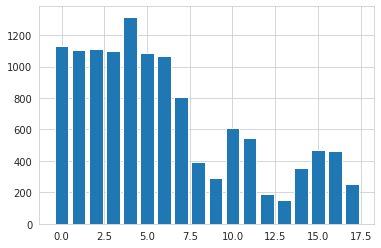

In [ ]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100

	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
# Handle imbalanced data
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=0)
# rus.fit(X_train, y_train)
# X_resampled, y_resampled = rus.sample(X_train, y_train)

# pass

# Handle Imbalanced Data

Counter({4.0: 1317, 0.0: 1132, 2.0: 1111, 1.0: 1108, 3.0: 1097, 5.0: 1087, 6.0: 1064, 7.0: 807, 10.0: 611, 11.0: 545, 15.0: 469, 16.0: 466, 8.0: 391, 14.0: 355, 9.0: 291, 17.0: 256, 12.0: 189, 13.0: 154})
Class=4, n=1290 (10.726%)
Class=3, n=1072 (8.913%)
Class=8, n=388 (3.226%)
Class=0, n=1066 (8.863%)
Class=14, n=352 (2.927%)
Class=15, n=447 (3.717%)
Class=2, n=1075 (8.938%)
Class=10, n=589 (4.897%)
Class=7, n=786 (6.535%)
Class=1, n=1060 (8.814%)
Class=17, n=248 (2.062%)
Class=5, n=1034 (8.597%)
Class=6, n=1047 (8.705%)
Class=13, n=154 (1.280%)
Class=11, n=510 (4.240%)
Class=16, n=448 (3.725%)
Class=9, n=289 (2.403%)
Class=12, n=172 (1.430%)


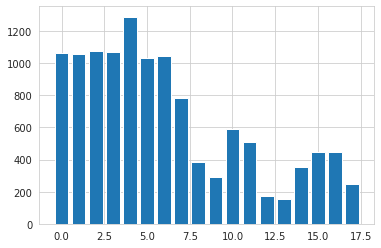

In [ ]:
# Undersample and plot imbalanced dataset with Tomek Links
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y_train)
print(counter)
# define the undersampling method
undersample = TomekLinks()
# transform the dataset
X, y = undersample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()



In [ ]:
# # example of oversampling a multi-class classification dataset
# from pandas import read_csv
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from matplotlib import pyplot
# from sklearn.preprocessing import LabelEncoder
# # define the dataset location

# # load the csv file as a data frame


# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
# # summarize distribution
# counter = Counter(y)
# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

# Apply Supervised conventional machine learning (CML)

## Random Forest Classifier

In [ ]:
#Classifying HAR samples:

lr_r = RandomForestClassifier(n_estimators=300, max_features='sqrt')
lr_r.fit(X,  y)
accuracy_r = lr_r.score(X_test, y_test)

In [ ]:
# Showing results:

print('Classification Accuracy: ',accuracy_r)
y_pred=lr_r.predict(X_test)
print('\nConfusion Report: ') 
print(classification_report(y_test, y_pred))

Classification Accuracy:  0.9313253012048193

Confusion Report: 
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       377
         1.0       0.93      0.89      0.91       375
         2.0       0.90      0.96      0.93       359
         3.0       0.94      0.98      0.96       373
         4.0       0.96      0.98      0.97       436
         5.0       0.93      0.90      0.91       363
         6.0       0.94      0.97      0.96       352
         7.0       0.95      0.91      0.93       267
         8.0       1.00      0.97      0.98       133
         9.0       1.00      0.97      0.98        96
        10.0       0.97      0.92      0.94       201
        11.0       0.89      0.89      0.89       176
        12.0       0.87      0.63      0.73        63
        13.0       0.86      0.81      0.83        52
        14.0       0.97      0.99      0.98       119
        15.0       0.93      0.94      0.93       160
        16.0    

## K-nearest Neighbour

In [ ]:

neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X,  y)
accuracy_knn = neigh.score(X_test, y_test)

In [ ]:
print('Classification Accuracy: ',accuracy_knn)
y_pred=neigh.predict(X_test)
print('\nConfusion Report: ') 
print(classification_report(y_test, y_pred))

Classification Accuracy:  0.8578313253012049

Confusion Report: 
              precision    recall  f1-score   support

         0.0       0.76      0.90      0.83       377
         1.0       0.86      0.81      0.83       375
         2.0       0.90      0.89      0.90       359
         3.0       0.91      0.97      0.94       373
         4.0       0.89      0.97      0.93       436
         5.0       0.88      0.75      0.81       363
         6.0       0.92      0.92      0.92       352
         7.0       0.90      0.84      0.87       267
         8.0       0.96      0.97      0.96       133
         9.0       0.97      0.94      0.95        96
        10.0       0.89      0.80      0.84       201
        11.0       0.63      0.84      0.72       176
        12.0       0.57      0.44      0.50        63
        13.0       0.58      0.48      0.53        52
        14.0       0.96      0.93      0.94       119
        15.0       0.80      0.70      0.75       160
        16.0    

## Decision Tree

In [ ]:

decision_tree = DecisionTreeClassifier(criterion="gini")
decision_tree.fit(X, y)
predictions = decision_tree.predict(X_test)

In [ ]:
accuracy_dt = decision_tree.score(X_test, y_test)
print('Classification Accuracy: ',accuracy_dt)

print('\nConfusion Report: ') 
print(classification_report(y_test, predictions))

Classification Accuracy:  0.8554216867469879

Confusion Report: 
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       377
         1.0       0.83      0.80      0.81       375
         2.0       0.88      0.92      0.90       359
         3.0       0.91      0.91      0.91       373
         4.0       0.92      0.93      0.93       436
         5.0       0.81      0.80      0.81       363
         6.0       0.93      0.90      0.91       352
         7.0       0.86      0.87      0.86       267
         8.0       0.98      0.96      0.97       133
         9.0       0.85      0.90      0.87        96
        10.0       0.85      0.83      0.84       201
        11.0       0.78      0.75      0.76       176
        12.0       0.42      0.48      0.45        63
        13.0       0.61      0.77      0.68        52
        14.0       0.95      0.97      0.96       119
        15.0       0.86      0.81      0.83       160
        16.0    

## Logistic Regression

In [ ]:
# train with logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X, y)
y_pred = lr.predict(X_test)

In [ ]:
# Score of logistic regression

accuracy_lr = lr.score(X_test, y_test)
print('Classification Accuracy: ',accuracy_lr)

print('\nConfusion Report: ') 
print(classification_report(y_test, y_pred))

Classification Accuracy:  0.16

Confusion Report: 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       377
         1.0       0.00      0.00      0.00       375
         2.0       0.00      0.00      0.00       359
         3.0       0.54      0.09      0.15       373
         4.0       0.11      1.00      0.21       436
         5.0       0.00      0.00      0.00       363
         6.0       0.00      0.00      0.00       352
         7.0       0.00      0.00      0.00       267
         8.0       0.63      0.86      0.73       133
         9.0       0.00      0.00      0.00        96
        10.0       0.00      0.00      0.00       201
        11.0       0.00      0.00      0.00       176
        12.0       0.00      0.00      0.00        63
        13.0       0.00      0.00      0.00        52
        14.0       0.91      0.45      0.60       119
        15.0       0.00      0.00      0.00       160
        16.0       0.73      0

## Adaboost

In [ ]:
#Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.5, random_state=0)

# Train Adaboost Classifer
ada.fit(X, y)
accuracy_adaboost = ada.score(X_test, y_test)

In [ ]:
y_pred = ada.predict(X_test)
print('Classification Accuracy: ',accuracy_adaboost)

print('\nConfusion Report: ') 
print(classification_report(y_test, y_pred))

Classification Accuracy:  0.3869879518072289

Confusion Report: 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       377
         1.0       0.00      0.00      0.00       375
         2.0       0.24      0.97      0.38       359
         3.0       0.72      0.90      0.80       373
         4.0       0.84      0.72      0.77       436
         5.0       0.00      0.00      0.00       363
         6.0       0.37      0.05      0.09       352
         7.0       0.34      0.82      0.48       267
         8.0       0.20      0.12      0.15       133
         9.0       0.28      0.26      0.27        96
        10.0       0.72      0.36      0.48       201
        11.0       0.40      0.77      0.53       176
        12.0       0.00      0.00      0.00        63
        13.0       0.41      0.42      0.42        52
        14.0       0.73      0.37      0.49       119
        15.0       0.17      0.34      0.23       160
        16.0    

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=150, learning_rate=learning_rate, max_features='sqrt', max_depth=2, random_state=42)
    gb_clf.fit(X, y)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

In [ ]:
print('Gadient descent accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

In [ ]:
gb_clf3= GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_features='sqrt', max_depth=2, random_state=42)
gb_clf3.fit(X, y)
predictions = gb_clf3.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[324  19  18   2   0  14   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 14 320  11   0   0  30   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 10   3 336   5   2   0   1   0   0   1   1   0   0   0   0   0   0   0]
 [  0   0   2 360   0   0   0   0   0   1   0   3   1   5   0   0   0   1]
 [  0   0   0   0 427   0   2   6   0   0   1   0   0   0   0   0   0   0]
 [ 33  14   5   1   0 310   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   3   1   0   0 338   6   0   0   4   0   0   0   0   0   0   0]
 [  0   0   0   2   8   0   3 246   0   0   3   0   0   0   0   4   1   0]
 [  0   0   0   0   0   0   0   0 131   0   0   0   0   0   1   1   0   0]
 [  0   0   0   0   0   0   0   5   0  90   0   0   1   0   0   0   0   0]
 [  0   0   1   0  13   0   3   4   0   0 180   0   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0   0 157  11   0   0   3   2   0]
 [  0   0   1   4   0   0   0   1   0   0   0  12  41   0   0   0   4   0]
 [  0   0   0   2   0   0

In [ ]:
print('Gadient descent accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

## XgBoost

In [ ]:

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X, y)

XGBClassifier(alpha=10, learning_rate=1.0, max_depth=4,
              objective='multi:softprob')

In [ ]:
# make predictions on test data

y_pred = xgb_clf.predict(X_test)

In [ ]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Validation

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:

accuracy_list = []
f1_list = []
mcc_list = []
rocauc_list = []
recall_list = []
precision_list = []
fasle_true_positive_list = []
y_scores_list = []
model =['XgBoost', 'KNN', 'Random Forest' ,'DT', 'Logistic Regression', 'Ada Boost', 'Gradient Boosting']


In [ ]:
model_list = [xgb_clf,neigh,lr_r,decision_tree, lr, ada, gb_clf3]

In [ ]:
for model in model_list:
    y_pred_val = model.predict(X_val)
    accuracy_list.append(model.score(X_val, y_val))
    f1_list.append(f1_score(y_pred_val, y_val, zero_division=0,average='macro'))
    mcc_list.append(matthews_corrcoef(y_pred_val,y_val))
    rocauc_list.append(roc_auc_score(y_val,model.predict_proba(X_val),multi_class='ovr'))
    recall_list.append(recall_score(y_pred_val, y_val, zero_division=0,average='macro'))
    precision_list.append(precision_score(y_pred_val,y_val, zero_division=0,average='macro'))
    y_scores = model.predict_proba(X_val)
    print('\nConfusion Matrix: ')
    print(confusion_matrix(y_val,y_pred_val))
    print('\nConfusion Report: ') 
    print(classification_report(y_val, y_pred_val))

  


Confusion Matrix: 
[[347  10  14   0   0   6   0   0   0   0   0   0   0   0   0   0   0   0]
 [  7 373   4   0   0   7   0   0   0   0   0   0   0   0   0   0   0   0]
 [  7   9 307   1   0   3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   3 379   0   0   2   5   0   0   0   2   2   0   0   2   0   1]
 [  0   0   1   0 411   0   1   5   0   0   7   0   0   0   0   0   0   0]
 [  8   3   5   0   0 347   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2   4   1   0 326   9   0   0   3   0   0   0   0   0   0   1]
 [  0   0   0   0   8   0   3 243   2   2   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   1   0 136   1   0   0   0   0   1   0   3   0]
 [  0   0   0   0   1   0   0   1   0  89   1   0   0   0   1   0   0   0]
 [  0   0   2   0   9   0   3   3   0   0 176   0   0   0   0   0   0   0]
 [  0   0   0   6   0   0   0   0   1   0   0 146   2   0   0   4   1   1]
 [  0   0   0   3   0   0   0   1   0   0   0   5  48   0   1   2   5   0]
 [  0

In [ ]:
print("Accuracy:" ,accuracy_list)
print("F1:" ,f1_list)
print("MCC:" ,mcc_list)
print("ROCAUC:" ,rocauc_list)
print("Recall:" ,mcc_list)
print("Precison:" ,precision_list)
# xgb_clf,neigh,lr_r,decision_tree, lr,ada, gd

In [ ]:
# modelss =['XgBoost', 'KNN', 'Random Forest' ,'DT', 'Logistic Regression', 'Ada Boost', 'Gradient Boosting']
# for i in range(len(model)):
#   print(modelss[i])
#   print(accuracy_list[i]*100)
#   print(recall_list[i]*100)
#   print(f1_list[i]*100)
#   print(precision_list[i]*100)

# Performance Analysis

In [ ]:
accuracy = [accuracy_list[0]*100, accuracy_list[1]*100, accuracy_list[2]*100, accuracy_list[3]*100, accuracy_list[4]*100, accuracy_list[5]*100, accuracy_list[6]*100]


plt.figure(figsize=(12,12)) 
plt.bar(model,accuracy,color=['#2f3180', '#1d1e4e', '#108690', '#fccf14','#c56766','#2f7890', '#3d6753'])
plt.title('Accuracy Comparison')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=-50) # Set
plt.show()

In [ ]:
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('ML-HAR.ipynb')

In [ ]:
# calculate ROC curve
